In [1]:
import pandas as pd
import numpy as np
import random
from rdkit import Chem
from snn_model import get_loss_fn
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from utils import load_dataset_df, smiles_to_descriptor



No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\knsve\Desktop\MEI\Tese\torch\snn_venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometri

In [2]:
files = ['tox21.csv','sider.csv', 'BBBP.csv']
dt_file = files[0]
dirname = dt_file.removesuffix('.csv')

df, targets = load_dataset_df(filename=dt_file)

""" for t in targets:
    df_temp = df[[t, 'smiles']].dropna()
    class_counts = df[t].count()
    class_sum = df[t].sum()
    print(t, class_counts, class_sum) 
  """   
if dirname == 'tox21':
    # SR-ARE
    target_name = targets[7]
    # SR-MMP
elif dirname == 'sider':
    #Hepatobiliary disorders 1427 samples, 0.52 class ratio
    target_name = targets[0]
else:
    target_name = targets[0]
    
df = df[[target_name, 'smiles']].dropna()

In [3]:
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator, GetRDKitFPGenerator
from rdkit.Chem import MACCSkeys, Descriptors

array_size = len(Descriptors._descList)
row = df.iloc[random.randint(0, len(df))]
mol = Chem.MolFromSmiles(row['smiles'])
mol_desc = np.zeros(array_size)        
if mol is None:
    pass
else:
    j = 0
    errors = 0
    for _, fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            #import traceback
            #traceback.print_exc()
            errors += 1
            val = -1
        mol_desc[j] = val
        j+=1
print(f"{errors} ERRORS")   
for k in range(array_size):
    print(f"{mol_desc[k]:.2f}")

0 ERRORS
8.66
8.66
0.16
-0.67
0.48
12.00
134.17
120.06
134.09
56.00
0.00
0.05
-0.40
0.40
0.05
1.00
1.33
1.33
16.29
9.88
2.24
-2.24
2.18
-2.32
4.74
0.00
1.95
3.82
51.19
7.33
5.67
5.67
4.24
3.07
3.07
2.33
2.33
1.76
1.76
0.49
0.49
-0.12
93.41
8.88
3.82
1.93
54.95
15.32
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
6.92
6.42
5.41
19.82
15.32
0.00
0.00
0.00
5.41
13.34
19.82
0.00
0.00
0.00
0.00
0.00
0.00
0.00
35.14
0.00
5.41
13.34
0.00
0.00
0.00
0.00
60.69
5.41
0.00
0.00
19.82
6.42
0.00
0.00
0.00
6.92
0.00
15.32
0.00
0.00
0.00
25.97
-0.67
0.00
0.00
0.59
1.35
0.00
1.00
9.00
3.00
3.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
3.00
3.00
3.00
0.00
4.00
0.00
0.00
0.00
0.00
0.00
3.77
0.00
-0.64
33.98
0.00
3.00
3.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00


In [4]:
dtype = torch.float32
split = "scaffold"
dataset = None

split = "random"
data_config = {"desc": 'rdkit',
                "size": 0,
            }
desc_array, target_array = smiles_to_descriptor(df, data_config=data_config, target_name=target_name, missing_val=0)
# Create Torch Dataset
desc_tensor = torch.tensor(desc_array, dtype=dtype)
target_tensor = torch.tensor(target_array, dtype=dtype).long()

dataset = TensorDataset(desc_tensor, target_tensor)
print(desc_tensor.size())

[23:33:46] Explicit valence for atom # 8 Al, 6, is greater than permitted
[23:33:50] Explicit valence for atom # 3 Al, 6, is greater than permitted
[23:33:50] Explicit valence for atom # 4 Al, 6, is greater than permitted
[23:33:56] Explicit valence for atom # 4 Al, 6, is greater than permitted
[23:34:01] Explicit valence for atom # 9 Al, 6, is greater than permitted
[23:34:01] Explicit valence for atom # 5 Al, 6, is greater than permitted
[23:34:05] Explicit valence for atom # 16 Al, 6, is greater than permitted


torch.Size([5825, 217])


In [7]:
print(desc_tensor)

tensor([[11.1076, 11.1076,  0.0730,  ...,  0.0000,  0.0000,  0.0000],
        [11.1658, 11.1658,  0.2071,  ...,  0.0000,  0.0000,  0.0000],
        [10.2519, 10.2519,  0.3835,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [11.7873, 11.7873,  0.0823,  ...,  0.0000,  0.0000,  0.0000],
        [10.3725, 10.3725,  0.0883,  ...,  0.0000,  0.0000,  0.0000],
        [ 5.6561,  5.6561,  0.3258,  ...,  0.0000,  0.0000,  0.0000]])


In [ ]:
mean = desc_tensor.mean(dim=0)
std = desc_tensor.std(dim=0)


torch.Size([217])


In [ ]:
from snntorch import spikegen, surrogate
a = torch.Tensor([1, 1, 1, 0, 0, 0, 0])
spikegen.rate(a, num_steps=10, gain=0.25)

[ 0.1217944 -0.3117612  0.3342864]
[-0.10410815 -0.52797145 -0.06926101]
[-0.30238807 -0.00382334  0.40599084]
[-0.07184583 -0.07309306 -0.47157556]
[ 0.09049731 -0.57338524 -0.3668458 ]
[ 0.11447001 -0.30855978  0.19713032]
[ 0.51725197 -0.11549658 -0.42860317]
[-0.5395527   0.32744807 -0.29893488]


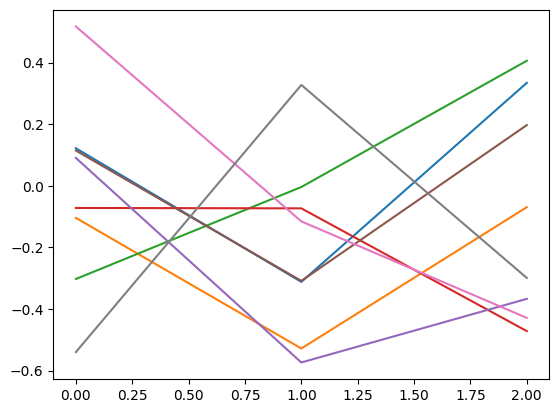

In [39]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a Conv1D layer
conv1d = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, dilation=2)

# Get the weights (kernels)
kernels = conv1d.weight.detach().cpu().numpy()  # Shape: (out_channels, in_channels, kernel_size)

# Plot the kernels
for i, kernel in enumerate(kernels):

    print(kernel[0])
    plt.plot(kernel[0], label=f'Filter {i}')
    

In [ ]:
import snntorch as snn
neuron = snn.Leaky(beta=0.95)
print(neuron.threshold)

In [ ]:
""" from rdkit import Chem
from rdkit.Chem import Descriptors

smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
mol = Chem.MolFromSmiles(smiles)

# Get all available descriptors dynamically
all_descriptors = {name: func(mol) 
                   for name, func in Descriptors.__dict__.items() 
                   if callable(func) and not name.startswith("__")}

print(all_descriptors) """

# CONV1D HAS A BIAS PARAMETER -> A SEQUENCE OF ZEROS CAN PRODUCE SYNAPTIC INPUT FOR THE LIF NEURON

In [ ]:
import torch
import torch.nn as nn
import snntorch as snn
import matplotlib.pyplot as plt

beta = 0.95
time_steps = 100
num_spikes = int(time_steps * 0.1)
spike_train = torch.zeros((1, 1, time_steps))
spike_times = random.sample(range(time_steps), num_spikes)
spike_train[0, 0, spike_times] = 1


conv1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)


conv_output = conv1d(spike_train)

lif = snn.Leaky(beta=beta)#, learn_threshold=True)
lif.reset_mem()


mem = torch.zeros(1)  # Initial membrane potential
mem_trace = []
spk_trace = []
thresholds = [lif.threshold.item()]
print("initial threshold:", lif.threshold.item())
for t in range(conv_output.shape[-1]):
    #print("mem:", mem.item())
    #print(conv_output[0, 0, t])
    spk, mem = lif(conv_output[0, 0, t], mem)
    #print(f"mem after input {conv_output[0, 0, t]:2.3f}:", mem.item())
    mem_trace.append(mem.item())
    spk_trace.append(spk.item())
    thresholds.append(lif.threshold.detach().item())
#print(conv_output[0, 0, :].tolist())
print("mem:",mem_trace)
print("spk:",spk_trace)
print("thr:",thresholds)
#print("syn:",conv_output[0, 0, :].detach().numpy())
#--------------------------------------------------
# Plot membrane potential over time
plt.figure(figsize=(20, 6))
plt.plot(mem_trace, label="Membrane Potential")
plt.plot(spk_trace, label="Spike Output")
plt.plot(thresholds, color='r', linestyle='--', label="Threshold")
plt.plot(conv_output[0, 0, :].detach().numpy(), label="Synaptic Input")
plt.xlabel("Time step")
plt.ylabel("Membrane Potential")
plt.legend()
plt.show()


In [ ]:
from snntorch import backprop

print(backprop.__spec__)


In [ ]:
import torch
import torch.nn as nn
import random
# Parameters
batch_size = 1
time_steps = 10
num_classes = 2

torch.manual_seed(68)
# Random spike train output for 2 classes (shape: batch_size, num_classes, time_steps)
spk_out = torch.randint(0, 2, (batch_size, num_classes, time_steps)).float()
# Target labels (binary classification: class 0 or class 1)
targets = torch.tensor([1])  # Assume the true class is class 0 for this example

# Compute the spike count by summing over time steps
spike_count = torch.sum(spk_out, dim=2)  # Sum over the time steps (dim=2)

# Apply LogSoftmax to the spike counts to get log probabilities
log_softmax_fn = nn.LogSoftmax(dim=-1)
log_p_y = log_softmax_fn(spike_count)

# Define Negative Log-Likelihood Loss (NLLLoss)
loss_fn = nn.NLLLoss()  # Mean reduction by default
loss = loss_fn(log_p_y, targets)

print(f"Spike output (spk_out):\n{spk_out}")
print(f"Spike count (summed over time):\n{spike_count}")
print(f"Log probabilities (log_p_y):\n{log_p_y}")
print(f"Loss: {loss.item()}")


In [ ]:
import torch
import torch.nn.functional as F

log_p_y = torch.tensor([[-2.1269, -0.1269]])  # Log probabilities
target = torch.tensor([1])  # True class is 1

# Use TorchScript to trace the function
traced = torch.jit.trace(F.nll_loss, (log_p_y, target))
print(traced.graph)

In [ ]:
import torch
from  torch.nn import Flatten

input_size = [32, 32]
#input_size = [1024]
x = torch.zeros(16, *input_size)

print(x.size())
flatten = Flatten()
x = flatten(x)
print(x.size())